In [47]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import curve_fit
import pandas as pd

In [48]:
data_100 = './RDE_data/02262020_MnO2_RDE_50mVs_100rpm_ExtendedBounds_IncreasedFlow_C04.mpt'
data_400 = './RDE_data/02262020_MnO2_RDE_50mVs_400rpm_ExtendedBounds_IncreasedFlow_C04.mpt'
data_900 = './RDE_data/02262020_MnO2_RDE_50mVs_900rpm_ExtendedBounds_IncreasedFlow_C04.mpt'
data_1600 = './RDE_data/02262020_MnO2_RDE_50mVs_1600rpm_ExtendedBounds_IncreasedFlow_C04.mpt'
data_2500 = './RDE_data/02262020_MnO2_RDE_50mVs_2500rpm_ExtendedBounds_IncreasedFlow_C04.mpt'

In [49]:
rpm100 = pd.read_csv(data_100,sep='\t',header=(52),usecols=range(12)) 
rpm400 = pd.read_csv(data_400,sep='\t',header=(52),usecols=range(12)) 
rpm900 = pd.read_csv(data_900,sep='\t',header=(52),usecols=range(12)) 
rpm1600 = pd.read_csv(data_1600,sep='\t',header=(52),usecols=range(12)) 
rpm2500 = pd.read_csv(data_2500,sep='\t',header=(52),usecols=range(12)) 

In [50]:
RPM = rpm100,rpm400,rpm900,rpm1600,rpm2500

In [51]:
data = rpm400
data

,mode,ox/red,error,control changes,counter inc.,time/s,control/V,Ewe/V,<I>/mA,cycle number,(Q-Qo)/C,P/W
0,2,1,0,0,0,0.000000,-0.996980,-0.997440,-0.264734,1.0,0.000000,0.000264
1,2,1,0,0,0,0.011000,-0.996430,-0.996845,-0.249511,1.0,-0.000003,0.000249
2,2,1,0,0,0,0.031000,-0.995430,-0.995866,-0.226134,1.0,-0.000008,0.000225
3,2,1,0,0,0,0.051000,-0.994429,-0.994879,-0.207541,1.0,-0.000012,0.000206
4,2,1,0,0,0,0.071000,-0.993429,-0.993882,-0.192264,1.0,-0.000016,0.000191
...,...,...,...,...,...,...,...,...,...,...,...,...
25565,2,1,0,1,0,511.881987,-1.003033,-1.003505,-0.049891,4.0,-0.019142,0.000050
25566,2,1,0,1,0,511.901987,-1.002033,-1.002477,-0.049846,4.0,-0.019143,0.000050
25567,2,1,0,1,0,511.921987,-1.001032,-1.001485,-0.049786,4.0,-0.019144,0.000050
25568,2,1,0,1,0,511.936987,-1.000282,-1.000743,-0.049698,4.0,-0.019145,0.000050


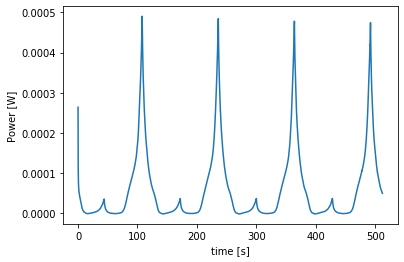

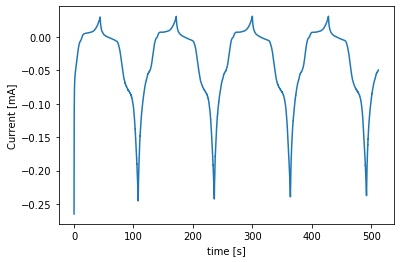

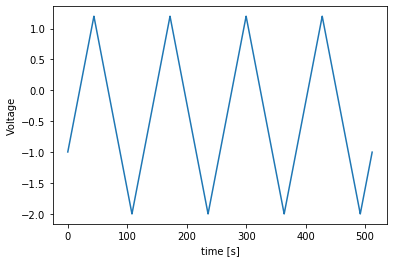

In [52]:
plt.plot(data['time/s'],data['P/W'])
plt.ylabel('Power [W]')
plt.xlabel('time [s]')
plt.show()

plt.plot(data['time/s'],data['<I>/mA'])
plt.ylabel('Current [mA]')
plt.xlabel('time [s]')
plt.show()

plt.plot(data['time/s'],data['Ewe/V'])
plt.ylabel('Voltage')
plt.xlabel('time [s]')
plt.show()

In [53]:
Power = np.array(data['P/W'])
Ewe = np.array(data['Ewe/V'])
Current = np.array(data['<I>/mA'])
cycles = data['cycle number']
time = data['time/s']

In [54]:
#Looking for equilibrium voltage
ocvs = []
print('{:9s} {:17s} {:14s}'.format('time[s]','current [mA]','V'))
for l in range(len(Current)):
    if abs(Current[l]) < 1e-5: #when current ~0
        print('{:5.1f} {:12.1e} {:12.3f}'.format(data['time/s'][l],data['<I>/mA'][l],data['Ewe/V'][l]))
        value = data['Ewe/V'][l] 
        if value > 0:
            ocvs.append(value)
            
# equil_potential = np.average(ocvs)
equil_potential = ocvs[9] #the voltage that corresponds to the smallest value for current in cycle 3
equil_potential

time[s]   current [mA]      V             
 55.9      8.9e-06        0.602
 55.9      3.4e-06        0.601
 55.9      1.4e-06        0.599
 56.0      3.6e-06        0.598
 56.0     -7.4e-06        0.597
 56.0     -7.5e-06        0.596
184.8      3.4e-06        0.555
184.8     -4.0e-06        0.554
312.8      8.3e-06        0.556
312.8      5.3e-07        0.555
396.0     -4.9e-06       -0.397
440.9      9.2e-06        0.552
440.9     -7.0e-06        0.551


0.55517089

In [55]:
E_cycle1 = []
E_cycle2 = []
E_cycle3 = []
E_cycle4 = []

I_cycle1 = []
I_cycle2 = []
I_cycle3 = []
I_cycle4 = []

for m in range(len(cycles)):
    if cycles[m] == 1:
        E_cycle1.append(Ewe[m])
        I_cycle1.append(Current[m])
    elif cycles[m] == 2:
        E_cycle2.append(Ewe[m])
        I_cycle2.append(Current[m])
    elif cycles[m] == 3:
        E_cycle3.append(Ewe[m])
        I_cycle3.append(Current[m])
    elif cycles[m] == 4:
        E_cycle4.append(Ewe[m])
        I_cycle4.append(Current[m])

print(len(E_cycle1), len(E_cycle2), len(E_cycle3), len(E_cycle4))
print('cycles are different lengths- be aware when trying to compare')

6390 6393 6393 6394
cycles are different lengths- be aware when trying to compare


Text(0.5, 0, 'Abs. Value of Current [mA]')

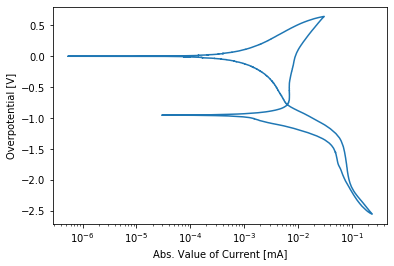

In [56]:
overpotentials = np.array(E_cycle3) - equil_potential
overpotentials

fig, ax = plt.subplots()
# ax.set_xscale('log', basex=np.e)
ax.set_xscale('log', basex=10)
plt.plot(abs(np.array(I_cycle3)),overpotentials)
plt.ylabel('Overpotential [V]')
plt.xlabel('Abs. Value of Current [mA]')

For cycle 3

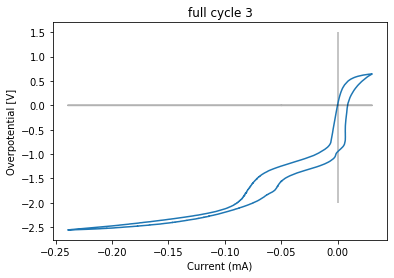

In [57]:
plt.plot(I_cycle3,np.array(E_cycle3)-equil_potential)
plt.plot(I_cycle3,np.zeros_like(I_cycle3),'k',alpha=.3)
plt.ylabel('Overpotential [V]')
plt.xlabel('Current (mA)')
plt.title('full cycle 3')
plt.vlines(0,-2,1.5,alpha=.3)
plt.show()

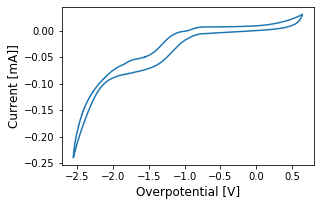

In [58]:
fig, ax = plt.subplots(figsize=(5, 3))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(np.array(E_cycle3)-equil_potential,I_cycle3)
ax.set_xlabel('Overpotential [V]', fontsize='large', fontweight='normal')
ax.set_ylabel('Current [mA]]', fontsize='large')

plt.show()

(0.55517089, 5.30423349687225e-07)

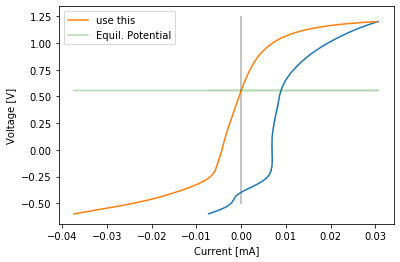

In [59]:
good_V = []
good_I = []

for i in range(len(E_cycle3)):
    if E_cycle3[i]<1.2 and E_cycle3[i]>-0.6:
        good_V.append(E_cycle3[i])
        good_I.append(I_cycle3[i])

h = int(len(good_I)/2)
plt.plot(good_I[0:h],good_V[0:h])
plt.plot(good_I[h:],good_V[h:], label = 'use this')
plt.plot(good_I,np.ones_like(good_I)*equil_potential,'g',label = 'Equil. Potential',alpha=.3)
plt.vlines(0,-.51,1.25,alpha=.3)
plt.ylabel('Voltage [V]')
plt.xlabel('Current [mA]')
plt.legend()
use_V = good_V[h:]
use_I = good_I[h:]

min_index = np.argmin(abs(np.array(use_I)))
equil_potential = use_V[min_index]
use_V[min_index],use_I[min_index]

### Butler-Volmer Equation

\begin{equation}
i = i_0*\left(exp\left(\frac{\alpha_a z F}{RT} \eta\right) -exp\left(-\frac{\alpha_c z F}{RT} \eta\right)\right)
\end{equation}

In [60]:
def BV(E_cell, j0, aa, ac):
    '''
    takes in cell potential [V] + parameters:j0 [A/m^2],aa,ac
    returns current DENSITY [A/m^2]
    '''
    F = 96485.33212 #C/mol
    R = 8.314 #J/mol-K
    T = 298 #K
#     equil_voltage = 0.5507 #V
#     equil_voltage = 0.3 #V

    #The equil_voltage = cell voltage when current = 0 for cycle 3
    equil_voltage = equil_potential #from above
    overpotential = np.array(E_cell) - equil_voltage
    z = 2
    
    j = j0*(np.exp(aa*z*F*overpotential*(R*T)**(-1))-np.exp(-ac*z*F*overpotential*(R*T)**(-1)))
    
    return j

### Testing with 1 cycle:

In [61]:
diam_mm = 3 #mm. Diam of RDE used for this experimental data
D = diam_mm/1000
A = np.pi*D**2/4 #m^2
A

7.068583470577034e-06

In [62]:
length = 20
use_current_densities = np.array(use_I)/A/1000 #A/m^2
print('Max current is {:.1f} amps\nMin current is {:.1f} amps'.format(max(use_current_densities),min(use_current_densities)))
j0_guesses = np.linspace(min(use_current_densities),max(use_current_densities),length)
aa0_guesses = np.linspace(0.001,.87,len(j0_guesses))
ac0_guesses = np.linspace(0.003,.9,len(j0_guesses))

#matrix of all combinations of these guesses:
p0s = np.array(np.meshgrid(j0_guesses,aa0_guesses,ac0_guesses)).T.reshape(-1,3)

np.shape(p0s)

Max current is 4.3 amps
Min current is -5.3 amps


(8000, 3)

### Testing with 1 guess

In [63]:
# ans = curve_fit(BV,use_v,use_current_densities,[.5,.5,.5],bounds=([-np.inf,0,0],[np.inf,2,2]),maxfev=4000)
ans = curve_fit(BV,use_V,use_current_densities,[.5,.5,.5],maxfev=4000)
j0_fit, aa_fit, ac_fit = ans[0]
print('j0,aa,ac:', j0_fit, aa_fit, ac_fit)
pcov = ans[1]
perr = np.sqrt(np.diag(pcov))
print('errors:',perr)
print('errors r this % of values:',perr/ans[0]*100 )

j0,aa,ac: 4.0254751458210237e-16 0.5001473925115831 0.4999999993932456
errors: [8.45652946e-16 7.43706374e-03 8.59286078e-10]
errors r this % of values: [2.10075312e+02 1.48697441e+00 1.71857216e-07]


In [64]:
identified_js = []
identified_aas = []
identified_acs = []

for m in range(len(p0s)):
    try: 
        anss = curve_fit(BV,use_V,use_current_densities,p0s[m])
#         anss = curve_fit(BV,use_V,use_I,p0s[m],maxfev=8000)
        gs = anss[0] 
        
        alphas_are_positive = gs[1]>0 and gs[2]>0
        j0_not_zero = gs[0]>1e-4
#         j0_not_zero = True
        different_from_guess = abs(gs[0]-p0s[m,0])>1e-2 and abs(gs[1]-p0s[m,1])>1e-3 and abs(gs[2]-p0s[m,2])>1e-3 
#         different_from_guess = gs[0] - p0s[m,0] !=0 and gs[1]-p0s[m,1]!=0  and gs[2]-p0s[m,2]!=0  
        alphas_big = gs[1]>0.1 and gs[2]>0.1
        a_sum = gs[1] + gs[2]
        one_ish = a_sum < 1.2 and a_sum<.8
        
        if alphas_are_positive and j0_not_zero and different_from_guess:
            print('guess:',p0s[m],'\ngenerated:',anss[0],'\nerrors:',np.sqrt(np.diag(anss[1])),'\n')
            identified_js.append(gs[0])
            identified_aas.append(gs[1])
            print('aa: {:.4f}'.format(gs[1]))
            identified_acs.append(gs[2])
            print('ac: {:.4f}'.format(gs[2]))
#             
    except RuntimeError:
        print('runtime error\n')


guess: [-5.29235874e+00  4.67368421e-02  3.00000000e-03] 
generated: [0.04341589 0.08894764 0.05303226] 
errors: [0.00089274 0.00046393 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-5.29235874e+00  9.24736842e-02  3.00000000e-03] 
generated: [0.04341466 0.08894826 0.05303261] 
errors: [0.0008926  0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-5.29235874e+00  1.38210526e-01  3.00000000e-03] 
generated: [0.04341497 0.08894811 0.05303252] 
errors: [0.00089264 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-5.29235874e+00  1.83947368e-01  3.00000000e-03] 
generated: [0.04341493 0.08894813 0.05303254] 
errors: [0.00089263 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-5.29235874e+00  2.29684211e-01  3.00000000e-03] 
generated: [0.04341552 0.08894783 0.05303236] 
errors: [0.0008927  0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-5.29235874e+00  2.75421053e-01  3.00000000e-03] 
generated: [0.04341539 0.0889479  0.0530324 ] 
errors: [0.00089268 0.00046394 0.00

guess: [-1.24755745  0.27542105  0.003     ] 
generated: [0.04341516 0.08894801 0.05303247] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-1.24755745  0.32115789  0.003     ] 
generated: [0.04341522 0.08894798 0.05303245] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-0.74195729  0.09247368  0.003     ] 
generated: [0.04341474 0.08894822 0.05303259] 
errors: [0.00089261 0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-0.74195729  0.13821053  0.003     ] 
generated: [0.04341511 0.08894803 0.05303248] 
errors: [0.00089265 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-0.74195729  0.18394737  0.003     ] 
generated: [0.04341518 0.088948   0.05303246] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-0.74195729  0.22968421  0.003     ] 
generated: [0.04341505 0.08894807 0.0530325 ] 
errors: [0.00089265 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-0.74195729  0.27542105  0.003  

guess: [3.30284400e+00 2.75421053e-01 3.00000000e-03] 
generated: [0.04341521 0.08894799 0.05303246] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [3.30284400e+00 3.21157895e-01 3.00000000e-03] 
generated: [0.04341519 0.088948   0.05303246] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [3.80844416e+00 1.00000000e-03 3.00000000e-03] 
generated: [0.04341583 0.08894767 0.05303228] 
errors: [0.00089273 0.00046393 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [3.80844416e+00 9.24736842e-02 3.00000000e-03] 
generated: [0.04341501 0.08894809 0.05303251] 
errors: [0.00089264 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [3.80844416e+00 1.38210526e-01 3.00000000e-03] 
generated: [0.04341512 0.08894803 0.05303248] 
errors: [0.00089265 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [3.80844416e+00 1.83947368e-01 3.00000000e-03] 
generated: [0.04341559 0.0889478  0.05303235] 
errors: [0.00089271 0.00046393 0.00025386] 

aa: 0.08

guess: [-2.76435793  0.04673684  0.05021053] 
generated: [0.04341549 0.08894785 0.05303237] 
errors: [0.00089269 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-2.76435793  0.09247368  0.05021053] 
generated: [0.04341533 0.08894793 0.05303242] 
errors: [0.00089268 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-2.76435793  0.13821053  0.05021053] 
generated: [0.04341469 0.08894824 0.0530326 ] 
errors: [0.00089261 0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-2.76435793  0.18394737  0.05021053] 
generated: [0.04341511 0.08894803 0.05303248] 
errors: [0.00089265 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-2.76435793  0.22968421  0.05021053] 
generated: [0.04341518 0.088948   0.05303246] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-2.76435793  0.27542105  0.05021053] 
generated: [0.04341569 0.08894774 0.05303232] 
errors: [0.00089272 0.00046393 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-2.76435793  0.32115789  0.05021

guess: [0.26924303 0.18394737 0.05021053] 
generated: [0.04341496 0.08894811 0.05303252] 
errors: [0.00089264 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [0.26924303 0.22968421 0.05021053] 
generated: [0.04341524 0.08894797 0.05303244] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [0.26924303 0.27542105 0.05021053] 
generated: [0.04341522 0.08894798 0.05303245] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [0.26924303 0.32115789 0.05021053] 
generated: [0.04341562 0.08894778 0.05303234] 
errors: [0.00089271 0.00046393 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [0.26924303 0.36689474 0.05021053] 
generated: [0.04341477 0.08894821 0.05303258] 
errors: [0.00089261 0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [0.77484319 0.001      0.05021053] 
generated: [0.04341498 0.0889481  0.05303252] 
errors: [0.00089264 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [0.77484319 0.04673684 0.05021053] 
generated: [0.0

guess: [3.80844416 0.22968421 0.05021053] 
generated: [0.04341518 0.088948   0.05303246] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [3.80844416 0.27542105 0.05021053] 
generated: [0.04341535 0.08894792 0.05303241] 
errors: [0.00089268 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [3.80844416 0.32115789 0.05021053] 
generated: [0.04341474 0.08894822 0.05303259] 
errors: [0.00089261 0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [3.80844416 0.36689474 0.05021053] 
generated: [0.04341535 0.08894791 0.05303241] 
errors: [0.00089268 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [3.80844416 0.41263158 0.05021053] 
generated: [0.04341523 0.08894797 0.05303245] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [4.31404432 0.04673684 0.05021053] 
generated: [0.0434155  0.08894784 0.05303237] 
errors: [0.0008927  0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [4.31404432 0.09247368 0.05021053] 
generated: [0.0

guess: [-3.26995810e+00  1.00000000e-03  9.74210526e-02] 
generated: [0.04341564 0.08894777 0.05303233] 
errors: [0.00089271 0.00046393 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-3.2699581   0.04673684  0.09742105] 
generated: [0.04341519 0.08894799 0.05303246] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-3.2699581   0.09247368  0.09742105] 
generated: [0.04341577 0.08894771 0.05303229] 
errors: [0.00089273 0.00046393 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-3.2699581   0.13821053  0.09742105] 
generated: [0.04341519 0.088948   0.05303246] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-3.2699581   0.18394737  0.09742105] 
generated: [0.04341467 0.08894826 0.05303261] 
errors: [0.0008926  0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-3.2699581   0.22968421  0.09742105] 
generated: [0.04341492 0.08894813 0.05303254] 
errors: [0.00089263 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-3.2699581   0.27542

guess: [-1.24755745  0.41263158  0.09742105] 
generated: [0.04341548 0.08894785 0.05303238] 
errors: [0.00089269 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-1.24755745  0.45836842  0.09742105] 
generated: [0.04341502 0.08894808 0.05303251] 
errors: [0.00089264 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-0.74195729  0.001       0.09742105] 
generated: [0.04341522 0.08894798 0.05303245] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-0.74195729  0.04673684  0.09742105] 
generated: [0.0434154  0.08894789 0.0530324 ] 
errors: [0.00089269 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-0.74195729  0.09247368  0.09742105] 
generated: [0.04341503 0.08894808 0.05303251] 
errors: [0.00089264 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-0.74195729  0.13821053  0.09742105] 
generated: [0.04341517 0.088948   0.05303246] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-0.74195729  0.18394737  0.09742

guess: [1.78604351e+00 1.00000000e-03 9.74210526e-02] 
generated: [0.04341495 0.08894811 0.05303253] 
errors: [0.00089263 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [1.78604351 0.04673684 0.09742105] 
generated: [0.04341473 0.08894823 0.05303259] 
errors: [0.00089261 0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [1.78604351 0.09247368 0.09742105] 
generated: [0.04341575 0.08894771 0.0530323 ] 
errors: [0.00089272 0.00046393 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [1.78604351 0.13821053 0.09742105] 
generated: [0.0434152  0.08894799 0.05303246] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [1.78604351 0.18394737 0.09742105] 
generated: [0.04341505 0.08894806 0.0530325 ] 
errors: [0.00089265 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [1.78604351 0.22968421 0.09742105] 
generated: [0.04341492 0.08894813 0.05303254] 
errors: [0.00089263 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [1.78604351 0.27542105 0.09742105] 
gen

guess: [3.80844416 0.45836842 0.09742105] 
generated: [0.04341488 0.08894815 0.05303255] 
errors: [0.00089263 0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [4.31404432e+00 1.00000000e-03 9.74210526e-02] 
generated: [0.04341524 0.08894797 0.05303244] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [4.31404432 0.04673684 0.09742105] 
generated: [0.04341519 0.08894799 0.05303246] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [4.31404432 0.09247368 0.09742105] 
generated: [0.04341575 0.08894771 0.0530323 ] 
errors: [0.00089272 0.00046393 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [4.31404432 0.13821053 0.09742105] 
generated: [0.04341519 0.08894799 0.05303246] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [4.31404432 0.18394737 0.09742105] 
generated: [0.04341469 0.08894824 0.0530326 ] 
errors: [0.00089261 0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [4.31404432 0.22968421 0.09742105] 
gen

guess: [-3.77555826  0.36689474  0.14463158] 
generated: [0.04341537 0.08894791 0.05303241] 
errors: [0.00089268 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-3.77555826  0.41263158  0.14463158] 
generated: [0.04341512 0.08894803 0.05303248] 
errors: [0.00089265 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-3.77555826  0.45836842  0.14463158] 
generated: [0.04341525 0.08894796 0.05303244] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-3.77555826  0.50410526  0.14463158] 
generated: [0.04341514 0.08894802 0.05303247] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-3.26995810e+00  1.00000000e-03  1.44631579e-01] 
generated: [0.04341503 0.08894807 0.0530325 ] 
errors: [0.00089264 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-3.2699581   0.04673684  0.14463158] 
generated: [0.04341546 0.08894786 0.05303238] 
errors: [0.00089269 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-3.2699581   0.09247

guess: [-1.75315761  0.50410526  0.14463158] 
generated: [0.04341482 0.08894818 0.05303256] 
errors: [0.00089262 0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-1.75315761  0.54984211  0.14463158] 
generated: [0.04341487 0.08894816 0.05303255] 
errors: [0.00089262 0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-1.24755745e+00  1.00000000e-03  1.44631579e-01] 
generated: [0.04341577 0.0889477  0.05303229] 
errors: [0.00089273 0.00046393 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-1.24755745  0.04673684  0.14463158] 
generated: [0.0434152  0.08894799 0.05303246] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-1.24755745  0.09247368  0.14463158] 
generated: [0.04341545 0.08894786 0.05303238] 
errors: [0.00089269 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-1.24755745  0.13821053  0.14463158] 
generated: [0.04341581 0.08894768 0.05303228] 
errors: [0.00089273 0.00046393 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-1.24755745  0.18394

guess: [0.77484319 0.09247368 0.14463158] 
generated: [0.04341543 0.08894787 0.05303239] 
errors: [0.00089269 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [0.77484319 0.13821053 0.14463158] 
generated: [0.04341494 0.08894812 0.05303253] 
errors: [0.00089263 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [0.77484319 0.18394737 0.14463158] 
generated: [0.04341507 0.08894806 0.05303249] 
errors: [0.00089265 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [0.77484319 0.22968421 0.14463158] 
generated: [0.04341546 0.08894786 0.05303238] 
errors: [0.00089269 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [0.77484319 0.27542105 0.14463158] 
generated: [0.04341548 0.08894785 0.05303238] 
errors: [0.00089269 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [0.77484319 0.32115789 0.14463158] 
generated: [0.04341556 0.08894781 0.05303235] 
errors: [0.0008927  0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [0.77484319 0.36689474 0.14463158] 
generated: [0.0

guess: [2.79724384 0.45836842 0.14463158] 
generated: [0.04341536 0.08894791 0.05303241] 
errors: [0.00089268 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [2.79724384 0.50410526 0.14463158] 
generated: [0.04341521 0.08894799 0.05303246] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [3.30284400e+00 1.00000000e-03 1.44631579e-01] 
generated: [0.04341576 0.08894771 0.0530323 ] 
errors: [0.00089273 0.00046393 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [3.302844   0.04673684 0.14463158] 
generated: [0.04341541 0.08894789 0.0530324 ] 
errors: [0.00089268 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [3.302844   0.09247368 0.14463158] 
generated: [0.04341544 0.08894787 0.05303239] 
errors: [0.00089269 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [3.302844   0.13821053 0.14463158] 
generated: [0.04341585 0.08894767 0.05303227] 
errors: [0.00089273 0.00046393 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [3.302844   0.18394737 0.14463158] 
gen

guess: [-5.29235874  0.50410526  0.19184211] 
generated: [0.04341536 0.08894791 0.05303241] 
errors: [0.00089268 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-5.29235874  0.54984211  0.19184211] 
generated: [0.0434152  0.08894799 0.05303246] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-5.29235874  0.59557895  0.19184211] 
generated: [0.04341523 0.08894797 0.05303245] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-4.78675858e+00  1.00000000e-03  1.91842105e-01] 
generated: [0.04341525 0.08894796 0.05303244] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-4.78675858  0.04673684  0.19184211] 
generated: [0.04341479 0.0889482  0.05303257] 
errors: [0.00089262 0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-4.78675858  0.09247368  0.19184211] 
generated: [0.04341516 0.08894801 0.05303247] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-4.78675858  0.13821

errors: [0.00089263 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-3.2699581   0.50410526  0.19184211] 
generated: [0.04341555 0.08894782 0.05303236] 
errors: [0.0008927  0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-3.2699581   0.54984211  0.19184211] 
generated: [0.04341483 0.08894817 0.05303256] 
errors: [0.00089262 0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-3.2699581   0.59557895  0.19184211] 
generated: [0.04341506 0.08894806 0.0530325 ] 
errors: [0.00089265 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-3.2699581   0.64131579  0.19184211] 
generated: [0.04341525 0.08894797 0.05303244] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-2.76435793e+00  1.00000000e-03  1.91842105e-01] 
generated: [0.04341525 0.08894796 0.05303244] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-2.76435793  0.04673684  0.19184211] 
generated: [0.04341505 0.08894807 0.0530325 ] 
errors: [0.00089265 0.000463

guess: [-1.24755745  0.64131579  0.19184211] 
generated: [0.04341525 0.08894796 0.05303244] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-0.74195729  0.04673684  0.19184211] 
generated: [0.04341516 0.08894801 0.05303247] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-0.74195729  0.09247368  0.19184211] 
generated: [0.04341518 0.088948   0.05303246] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-0.74195729  0.13821053  0.19184211] 
generated: [0.04341543 0.08894788 0.05303239] 
errors: [0.00089269 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-0.74195729  0.18394737  0.19184211] 
generated: [0.04341524 0.08894797 0.05303245] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-0.74195729  0.22968421  0.19184211] 
generated: [0.04341561 0.08894778 0.05303234] 
errors: [0.00089271 0.00046393 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-0.74195729  0.27542105  0.19184

guess: [1.28044335 0.13821053 0.19184211] 
generated: [0.04341563 0.08894777 0.05303233] 
errors: [0.00089271 0.00046393 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [1.28044335 0.18394737 0.19184211] 
generated: [0.04341524 0.08894797 0.05303245] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [1.28044335 0.22968421 0.19184211] 
generated: [0.04341562 0.08894778 0.05303234] 
errors: [0.00089271 0.00046393 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [1.28044335 0.27542105 0.19184211] 
generated: [0.04341494 0.08894812 0.05303253] 
errors: [0.00089263 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [1.28044335 0.32115789 0.19184211] 
generated: [0.04341524 0.08894797 0.05303244] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [1.28044335 0.36689474 0.19184211] 
generated: [0.04341526 0.08894796 0.05303244] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [1.28044335 0.41263158 0.19184211] 
generated: [0.0

guess: [3.302844   0.41263158 0.19184211] 
generated: [0.04341548 0.08894785 0.05303238] 
errors: [0.00089269 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [3.302844   0.45836842 0.19184211] 
generated: [0.04341483 0.08894817 0.05303256] 
errors: [0.00089262 0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [3.302844   0.50410526 0.19184211] 
generated: [0.0434147  0.08894824 0.0530326 ] 
errors: [0.00089261 0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [3.302844   0.54984211 0.19184211] 
generated: [0.04341493 0.08894813 0.05303254] 
errors: [0.00089263 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [3.302844   0.59557895 0.19184211] 
generated: [0.0434153  0.08894794 0.05303243] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [3.80844416 0.04673684 0.19184211] 
generated: [0.04341557 0.0889478  0.05303235] 
errors: [0.0008927  0.00046393 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [3.80844416 0.09247368 0.19184211] 
generated: [0.0

guess: [-4.78675858  0.59557895  0.23905263] 
generated: [0.04341522 0.08894798 0.05303245] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-4.78675858  0.64131579  0.23905263] 
generated: [0.04341488 0.08894815 0.05303255] 
errors: [0.00089263 0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-4.78675858  0.68705263  0.23905263] 
generated: [0.04341501 0.08894808 0.05303251] 
errors: [0.00089264 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-4.28115842  0.13821053  0.23905263] 
generated: [0.04341523 0.08894798 0.05303245] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-4.28115842  0.18394737  0.23905263] 
generated: [0.0434148  0.08894819 0.05303257] 
errors: [0.00089262 0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-4.28115842  0.22968421  0.23905263] 
generated: [0.04341517 0.088948   0.05303247] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-4.28115842  0.27542105  0.23905

guess: [-2.76435793  0.64131579  0.23905263] 
generated: [0.04341515 0.08894801 0.05303247] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-2.76435793  0.68705263  0.23905263] 
generated: [0.04341481 0.08894818 0.05303257] 
errors: [0.00089262 0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-2.25875777  0.13821053  0.23905263] 
generated: [0.04341514 0.08894802 0.05303248] 
errors: [0.00089265 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-2.25875777  0.18394737  0.23905263] 
generated: [0.04341508 0.08894805 0.05303249] 
errors: [0.00089265 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-2.25875777  0.22968421  0.23905263] 
generated: [0.04341515 0.08894801 0.05303247] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-2.25875777  0.27542105  0.23905263] 
generated: [0.04341503 0.08894807 0.05303251] 
errors: [0.00089264 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-2.25875777  0.32115789  0.23905

guess: [-0.23635713  0.32115789  0.23905263] 
generated: [0.04341526 0.08894796 0.05303244] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-0.23635713  0.36689474  0.23905263] 
generated: [0.0434156  0.08894779 0.05303234] 
errors: [0.00089271 0.00046393 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-0.23635713  0.41263158  0.23905263] 
generated: [0.04341525 0.08894796 0.05303244] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-0.23635713  0.45836842  0.23905263] 
generated: [0.04341516 0.08894801 0.05303247] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-0.23635713  0.50410526  0.23905263] 
generated: [0.04341493 0.08894813 0.05303254] 
errors: [0.00089263 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-0.23635713  0.54984211  0.23905263] 
generated: [0.04341465 0.08894827 0.05303261] 
errors: [0.0008926  0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-0.23635713  0.59557895  0.23905

guess: [1.78604351 0.27542105 0.23905263] 
generated: [0.04341497 0.08894811 0.05303252] 
errors: [0.00089264 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [1.78604351 0.32115789 0.23905263] 
generated: [0.04341497 0.08894811 0.05303252] 
errors: [0.00089264 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [1.78604351 0.36689474 0.23905263] 
generated: [0.04341543 0.08894787 0.05303239] 
errors: [0.00089269 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [1.78604351 0.41263158 0.23905263] 
generated: [0.04341542 0.08894788 0.05303239] 
errors: [0.00089269 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [1.78604351 0.45836842 0.23905263] 
generated: [0.04341469 0.08894825 0.0530326 ] 
errors: [0.0008926  0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [1.78604351 0.50410526 0.23905263] 
generated: [0.04341523 0.08894797 0.05303245] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [1.78604351 0.54984211 0.23905263] 
generated: [0.0

guess: [3.80844416 0.54984211 0.23905263] 
generated: [0.04341511 0.08894804 0.05303248] 
errors: [0.00089265 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [3.80844416 0.59557895 0.23905263] 
generated: [0.04341506 0.08894806 0.0530325 ] 
errors: [0.00089265 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [3.80844416 0.64131579 0.23905263] 
generated: [0.04341496 0.08894811 0.05303252] 
errors: [0.00089264 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [3.80844416 0.68705263 0.23905263] 
generated: [0.04341516 0.08894801 0.05303247] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [4.31404432 0.13821053 0.23905263] 
generated: [0.04341505 0.08894807 0.0530325 ] 
errors: [0.00089265 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [4.31404432 0.18394737 0.23905263] 
generated: [0.04341492 0.08894813 0.05303254] 
errors: [0.00089263 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [4.31404432 0.22968421 0.23905263] 
generated: [0.0

guess: [-3.77555826  0.54984211  0.28626316] 
generated: [0.04341513 0.08894803 0.05303248] 
errors: [0.00089265 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-3.77555826  0.59557895  0.28626316] 
generated: [0.04341518 0.088948   0.05303246] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-3.77555826  0.64131579  0.28626316] 
generated: [0.04341523 0.08894797 0.05303245] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-3.77555826  0.68705263  0.28626316] 
generated: [0.04341577 0.0889477  0.05303229] 
errors: [0.00089273 0.00046393 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-3.2699581   0.18394737  0.28626316] 
generated: [0.0434147  0.08894824 0.0530326 ] 
errors: [0.00089261 0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-3.2699581   0.22968421  0.28626316] 
generated: [0.04341544 0.08894787 0.05303239] 
errors: [0.00089269 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-3.2699581   0.27542105  0.28626

guess: [-1.75315761  0.73278947  0.28626316] 
generated: [0.04341525 0.08894796 0.05303244] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-1.75315761  0.77852632  0.28626316] 
generated: [0.04341491 0.08894814 0.05303254] 
errors: [0.00089263 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-1.24755745  0.22968421  0.28626316] 
generated: [0.04341542 0.08894788 0.05303239] 
errors: [0.00089269 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-1.24755745  0.27542105  0.28626316] 
generated: [0.04341517 0.08894801 0.05303247] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-1.24755745  0.32115789  0.28626316] 
generated: [0.04341526 0.08894796 0.05303244] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-1.24755745  0.36689474  0.28626316] 
generated: [0.0434147  0.08894824 0.0530326 ] 
errors: [0.00089261 0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-1.24755745  0.41263158  0.28626

guess: [0.26924303 0.73278947 0.28626316] 
generated: [0.04341553 0.08894783 0.05303236] 
errors: [0.0008927  0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [0.26924303 0.77852632 0.28626316] 
generated: [0.04341491 0.08894814 0.05303254] 
errors: [0.00089263 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [0.77484319 0.22968421 0.28626316] 
generated: [0.04341521 0.08894798 0.05303245] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [0.77484319 0.27542105 0.28626316] 
generated: [0.04341522 0.08894798 0.05303245] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [0.77484319 0.32115789 0.28626316] 
generated: [0.04341492 0.08894813 0.05303254] 
errors: [0.00089263 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [0.77484319 0.36689474 0.28626316] 
generated: [0.04341492 0.08894813 0.05303254] 
errors: [0.00089263 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [0.77484319 0.41263158 0.28626316] 
generated: [0.0

guess: [2.79724384 0.59557895 0.28626316] 
generated: [0.04341493 0.08894812 0.05303253] 
errors: [0.00089263 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [2.79724384 0.64131579 0.28626316] 
generated: [0.04341468 0.08894825 0.05303261] 
errors: [0.0008926  0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [2.79724384 0.68705263 0.28626316] 
generated: [0.04341525 0.08894797 0.05303244] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [2.79724384 0.73278947 0.28626316] 
generated: [0.04341504 0.08894807 0.0530325 ] 
errors: [0.00089264 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [3.302844   0.18394737 0.28626316] 
generated: [0.0434152  0.08894799 0.05303246] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [3.302844   0.27542105 0.28626316] 
generated: [0.04341517 0.08894801 0.05303247] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [3.302844   0.32115789 0.28626316] 
generated: [0.0

guess: [-4.78675858  0.68705263  0.33347368] 
generated: [0.04341491 0.08894813 0.05303254] 
errors: [0.00089263 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-4.28115842  0.32115789  0.33347368] 
generated: [0.04341467 0.08894826 0.05303261] 
errors: [0.0008926  0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-4.28115842  0.36689474  0.33347368] 
generated: [0.04341525 0.08894797 0.05303244] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-4.28115842  0.41263158  0.33347368] 
generated: [0.04341517 0.08894801 0.05303247] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-4.28115842  0.45836842  0.33347368] 
generated: [0.04341493 0.08894813 0.05303254] 
errors: [0.00089263 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-4.28115842  0.50410526  0.33347368] 
generated: [0.04341496 0.08894811 0.05303253] 
errors: [0.00089264 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-4.28115842  0.54984211  0.33347

guess: [-1.75315761  0.50410526  0.33347368] 
generated: [0.04341501 0.08894809 0.05303251] 
errors: [0.00089264 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-1.75315761  0.54984211  0.33347368] 
generated: [0.04341477 0.08894821 0.05303258] 
errors: [0.00089261 0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-1.75315761  0.59557895  0.33347368] 
generated: [0.04341497 0.08894811 0.05303252] 
errors: [0.00089264 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-1.75315761  0.64131579  0.33347368] 
generated: [0.04341517 0.08894801 0.05303247] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-1.75315761  0.68705263  0.33347368] 
generated: [0.04341525 0.08894797 0.05303244] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-1.75315761  0.73278947  0.33347368] 
generated: [0.04341535 0.08894791 0.05303241] 
errors: [0.00089268 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-1.75315761  0.77852632  0.33347

guess: [0.77484319 0.45836842 0.33347368] 
generated: [0.04341523 0.08894797 0.05303245] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [0.77484319 0.50410526 0.33347368] 
generated: [0.04341476 0.08894821 0.05303258] 
errors: [0.00089261 0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [0.77484319 0.54984211 0.33347368] 
generated: [0.04341527 0.08894795 0.05303244] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [0.77484319 0.59557895 0.33347368] 
generated: [0.04341497 0.0889481  0.05303252] 
errors: [0.00089264 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [0.77484319 0.64131579 0.33347368] 
generated: [0.04341523 0.08894798 0.05303245] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [0.77484319 0.68705263 0.33347368] 
generated: [0.04341524 0.08894797 0.05303245] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [0.77484319 0.73278947 0.33347368] 
generated: [0.0

guess: [3.302844   0.59557895 0.33347368] 
generated: [0.04341465 0.08894827 0.05303261] 
errors: [0.0008926  0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [3.302844   0.64131579 0.33347368] 
generated: [0.04341472 0.08894823 0.0530326 ] 
errors: [0.00089261 0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [3.302844   0.68705263 0.33347368] 
generated: [0.04341475 0.08894822 0.05303259] 
errors: [0.00089261 0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [3.302844   0.73278947 0.33347368] 
generated: [0.04341523 0.08894798 0.05303245] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [3.80844416 0.32115789 0.33347368] 
generated: [0.04341521 0.08894799 0.05303245] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [3.80844416 0.36689474 0.33347368] 
generated: [0.04341474 0.08894822 0.05303259] 
errors: [0.00089261 0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [3.80844416 0.41263158 0.33347368] 
generated: [0.0

guess: [-3.77555826  0.68705263  0.38068421] 
generated: [0.04341496 0.08894811 0.05303253] 
errors: [0.00089263 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-3.77555826  0.73278947  0.38068421] 
generated: [0.04341517 0.088948   0.05303246] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-3.2699581   0.41263158  0.38068421] 
generated: [0.04341491 0.08894813 0.05303254] 
errors: [0.00089263 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-3.2699581   0.45836842  0.38068421] 
generated: [0.04341525 0.08894796 0.05303244] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-3.2699581   0.50410526  0.38068421] 
generated: [0.04341487 0.08894815 0.05303255] 
errors: [0.00089263 0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-3.2699581   0.54984211  0.38068421] 
generated: [0.04341524 0.08894797 0.05303244] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-3.2699581   0.59557895  0.38068

guess: [-0.74195729  0.68705263  0.38068421] 
generated: [0.04341495 0.08894811 0.05303253] 
errors: [0.00089263 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-0.74195729  0.73278947  0.38068421] 
generated: [0.0434152  0.08894799 0.05303246] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-0.74195729  0.77852632  0.38068421] 
generated: [0.04341524 0.08894797 0.05303245] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-0.23635713  0.41263158  0.38068421] 
generated: [0.04341524 0.08894797 0.05303244] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-0.23635713  0.45836842  0.38068421] 
generated: [0.0434157  0.08894774 0.05303231] 
errors: [0.00089272 0.00046393 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-0.23635713  0.50410526  0.38068421] 
generated: [0.04341526 0.08894796 0.05303244] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-0.23635713  0.54984211  0.38068

guess: [2.29164368 0.73278947 0.38068421] 
generated: [0.04341524 0.08894797 0.05303244] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [2.79724384 0.32115789 0.38068421] 
generated: [0.04341524 0.08894797 0.05303245] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [2.79724384 0.41263158 0.38068421] 
generated: [0.04341524 0.08894797 0.05303245] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [2.79724384 0.45836842 0.38068421] 
generated: [0.04341505 0.08894807 0.0530325 ] 
errors: [0.00089265 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [2.79724384 0.50410526 0.38068421] 
generated: [0.04341566 0.08894776 0.05303233] 
errors: [0.00089271 0.00046393 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [2.79724384 0.54984211 0.38068421] 
generated: [0.04341522 0.08894798 0.05303245] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [2.79724384 0.59557895 0.38068421] 
generated: [0.0

guess: [-0.74195729  0.64131579  0.42789474] 
generated: [0.04341501 0.08894809 0.05303251] 
errors: [0.00089264 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-0.74195729  0.68705263  0.42789474] 
generated: [0.04341552 0.08894783 0.05303237] 
errors: [0.0008927  0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-0.74195729  0.73278947  0.42789474] 
generated: [0.0434149  0.08894814 0.05303254] 
errors: [0.00089263 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-0.74195729  0.77852632  0.42789474] 
generated: [0.04341521 0.08894798 0.05303245] 
errors: [0.00089266 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-0.23635713  0.54984211  0.42789474] 
generated: [0.04341467 0.08894826 0.05303261] 
errors: [0.0008926  0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-0.23635713  0.59557895  0.42789474] 
generated: [0.0434149  0.08894814 0.05303254] 
errors: [0.00089263 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-0.23635713  0.64131579  0.42789

C:\Users\MaryLou\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in multiply


guess: [-3.77555826  0.09247368  0.52231579] 
generated: [0.04341525 0.08894796 0.05303244] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [-3.2699581   0.09247368  0.52231579] 
generated: [0.04341525 0.08894797 0.05303244] 
errors: [0.00089267 0.00046394 0.00025386] 

aa: 0.0889
ac: 0.0530
runtime error

guess: [-0.23635713  0.04673684  0.52231579] 
generated: [0.043415   0.08894809 0.05303251] 
errors: [0.00089264 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [1.78604351 0.04673684 0.52231579] 
generated: [0.04341574 0.08894772 0.0530323 ] 
errors: [0.00089272 0.00046393 0.00025386] 

aa: 0.0889
ac: 0.0530
guess: [1.78604351 0.09247368 0.52231579] 
generated: [0.04341496 0.08894811 0.05303253] 
errors: [0.00089264 0.00046394 0.00025387] 

aa: 0.0889
ac: 0.0530
runtime error

guess: [-5.29235874  0.13821053  0.56952632] 
generated: [0.04341482 0.08894818 0.05303257] 
errors: [0.00089262 0.00046395 0.00025387] 

aa: 0.0889
ac: 0.0530
guess: [-4.28115

In [65]:
print(len(identified_js),len(identified_aas),len(identified_acs))
print('Relative Stdvs:\nj0_fit: {:.3f}\naa_fit: {:.3f}\nac_fit:{:.3f}\n'.format(np.std(identified_js)/np.average(identified_js),
                                                                              np.std(identified_aas)/np.average(identified_aas),
                                                                              np.std(identified_acs)/np.average(identified_acs)))
j0_fit = np.average(identified_js)
aa_fit = np.average(identified_aas)
ac_fit = np.average(identified_acs)

print('Values: \nj0_fit: {:.3f}\naa_fit: {:.3f}\nac_fit:{:.3f}'.format(j0_fit, aa_fit, ac_fit))

2028 2028 2028
Relative Stdvs:
j0_fit: 0.000
aa_fit: 0.000
ac_fit:0.000

Values: 
j0_fit: 0.043
aa_fit: 0.089
ac_fit:0.053


j0: 0.0434, aa: 0.0889, ac: 0.0530


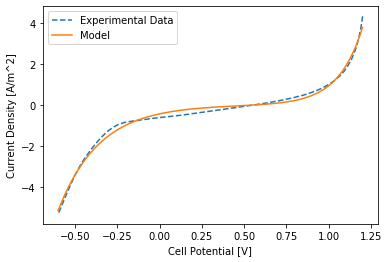

In [66]:
# paramys = [0.05151305, 0.37046147, 0.37045137]
paramys = j0_fit, aa_fit, ac_fit
# paramys = [5.27220332e-02, 8.16570098e-02, 4.85197831e-02]
# paramys =[(1.08614495e-05), 2.19024473e-01, 8.93331622e-01]
# paramys = [-.01,.4,.5]
print('j0: {:.4f}, aa: {:.4f}, ac: {:.4f}'.format(*paramys))
j_fits = BV(np.array(use_V),*paramys) #AMPS/m^2
# plt.plot(np.array(use_v)-0.544,np.zeros_like(use_v),'k',alpha=0.3)
# plt.vlines(0,-4.2,4.2, alpha=0.3)
plt.plot(np.array(use_V),use_current_densities, '--',label='Experimental Data')
# plt.plot(np.array(use_V),np.array(use_I), '--',label='Experimental Data')
plt.plot(np.array(use_V),j_fits,label='Model')
plt.ylabel('Current Density [A/m^2]')
# plt.ylabel('Current [mA]')
plt.xlabel('Cell Potential [V]')
# plt.xlim(.1,1.25)
# plt.ylim(-.1,.1)
plt.legend()
plt.show()
# plt.savefig('model_vs_data.png',dpi=100)

# fig, ax1 = plt.subplots()

# color = 'tab:red'
# ax1.set_xlabel('voltage')
# ax1.set_ylabel('data I', color=color)
# ax1.plot(use_v,use_current_densities, '--',color=color)
# # ax1.plot(times,Power_demands, '*',color='tab:grey',label = 'Power Demand (kW)')
# ax1.tick_params(axis='y', labelcolor=color)
# # plt.legend(loc = 'upper center')

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('model I', color=color)  # we already handled the x-label with ax1
# ax2.plot(use_v, j_fits, '-',color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped

# plt.show()

In [40]:
#store so can be accessed by other notebook
air_params = paramys
%store air_params

Stored 'air_params' (tuple)
